In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
#데이터 불러오기
df = pd.read_csv("C:/Ai/DL/diabetes.csv", index_col=0)
df_new = df.drop('Outcome', axis =1)
df_new

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,,
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63
2,122,70,27,0,36.8,0.340,27
5,121,72,23,112,26.2,0.245,30


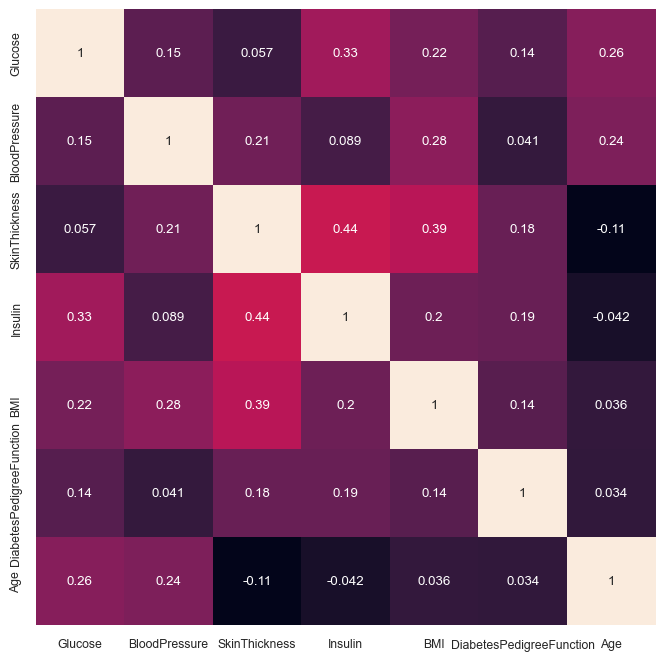

In [3]:

#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df_new.corr()

#히트맵
plt.figure(figsize=(8,8))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [6]:
X = df_new.drop('BMI', axis=1)
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,
6,148,72,35,0,0.627,50
1,85,66,29,0,0.351,31
8,183,64,0,0,0.672,32
1,89,66,23,94,0.167,21
0,137,40,35,168,2.288,33


In [7]:
y = df_new['BMI']
y.head()

Pregnancies
6    33.6
1    26.6
8    23.3
1    28.1
0    43.1
Name: BMI, dtype: float64

In [8]:
Y = pd.get_dummies(y).values
X = X.values

In [9]:
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [10]:
X

array([[148.   ,  72.   ,  35.   ,   0.   ,   0.627,  50.   ],
       [ 85.   ,  66.   ,  29.   ,   0.   ,   0.351,  31.   ],
       [183.   ,  64.   ,   0.   ,   0.   ,   0.672,  32.   ],
       ...,
       [121.   ,  72.   ,  23.   , 112.   ,   0.245,  30.   ],
       [126.   ,  60.   ,   0.   ,   0.   ,   0.349,  47.   ],
       [ 93.   ,  70.   ,  31.   ,   0.   ,   0.315,  23.   ]])

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((614, 6), (614, 248), (154, 6), (154, 248))

In [13]:
#모델 구축

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(6,input_shape=(6,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 30)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,213 (4.74 KB)

 Trainable params: 1,213 (4.74 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 379.6308 - mse: 380.3119 - val_loss: 9.3419 - val_mse: 9.3816
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.9680 - mse: 5.9739 - val_loss: 2.8281 - val_mse: 2.8759
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.6009 - mse: 2.5540 - val_loss: 6.2339 - val_mse: 6.2907
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.9625 - mse: 3.9701 - val_loss: 2.0865 - val_mse: 2.1207
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6918 - mse: 2.6935 - val_loss: 0.7324 - val_mse: 0.7479
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3903 - mse: 2.3965 - val_loss: 0.5876 - val_mse: 0.5998
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5092 - mse: 1.5148 - val_loss: 0.8512 - val_mse: 0.8688
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.4925 - mse: 2.5000 - val_loss: 1.5453 - val_mse: 1.5619
Epoch 9/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5133 -

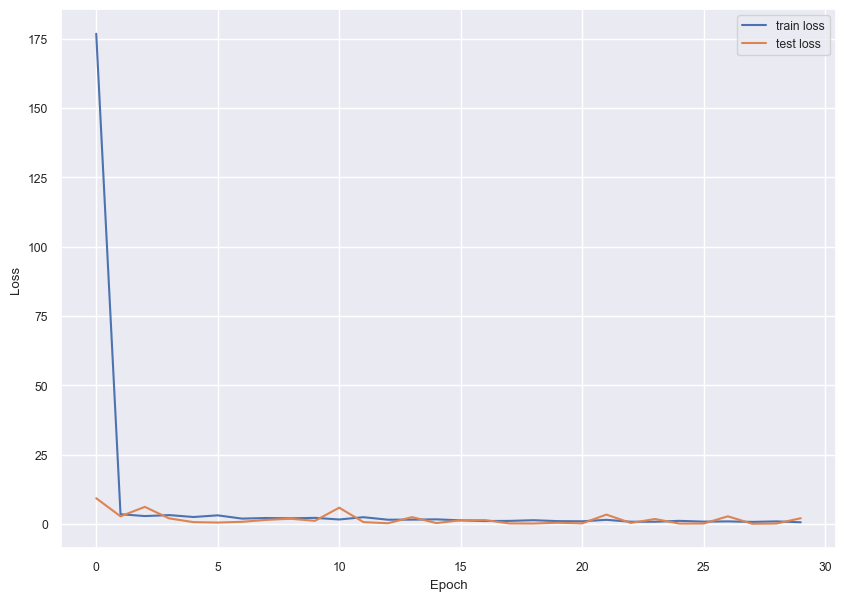

In [16]:

# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(30), history.history['loss'], label='train loss')
plt.plot(range(30), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0987 - mse: 2.1008 


[2.1392924785614014, 2.1456387042999268]